$\large\textbf{Question 1}$



p =14 where N = 0 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

$\large\textbf{Question 1.2}$

In [27]:
def Unif_Rand_Perm(n, a, N):
  List = []

  for i in range(N):
    Permutation = np.random.permutation(n) + 1
    sum = 0
    
    for j in range(1, n + 1):
      sum = sum + j * Permutation[j-1]
    if sum > a:
      List.append(Permutation)

  List,count = np.unique(List,axis=0,return_counts=True)
  
  return List,count

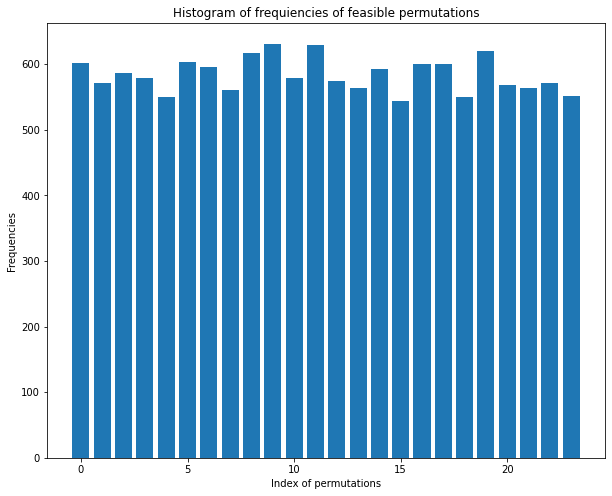

In [28]:
n,a,N = 4,14,14000
Feas_Perm_list,count = Unif_Rand_Perm(n,a,N)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feas_Perm_list))),count)
plt.title('Histogram of frequiencies of feasible permutations')
plt.ylabel('Frequencies')
plt.xlabel("Index of permutations")
plt.show()

$\large\textbf{Question 1.3}$

In [29]:
def Random_Feasible_Neighbour(Permutation):
  n = len(Permutation)
  List = []
  for i in range(n):
    for j in range(i+1,n):
      p_i = Permutation[i]
      p_j = Permutation[j]
      Permutation[i] = p_j
      Permutation[j] = p_i

      List.append(Permutation.copy())

      p_i = Permutation[i]
      p_j = Permutation[j]
      Permutation[j] = p_i
      Permutation[i] = p_j

  return np.array(List), List[np.random.randint(0, len(List))]

In [30]:
Random_Feasible_Neighbour([1,2,3,4])

(array([[2, 1, 3, 4],
        [3, 2, 1, 4],
        [4, 2, 3, 1],
        [1, 3, 2, 4],
        [1, 4, 3, 2],
        [1, 2, 4, 3]]), [1, 2, 4, 3])

In [31]:
index = np.random.randint(0, len(Feas_Perm_list))
Permutation = Feas_Perm_list[index]
print("Given Permutation:", tuple(Permutation))

Feasible_Neighbours, Uniformly_Chosen_Random_Feasible_Neaighbour = Random_Feasible_Neighbour(Permutation)

print('Feasible Neighbours of the Given Permutation:', [tuple(i) for i in Feasible_Neighbours])
print('Uniformly Chosen Random Feasible Neaighbour:', tuple(Uniformly_Chosen_Random_Feasible_Neaighbour))

Given Permutation: (1, 4, 2, 3)
Feasible Neighbours of the Given Permutation: [(4, 1, 2, 3), (2, 4, 1, 3), (3, 4, 2, 1), (1, 2, 4, 3), (1, 3, 2, 4), (1, 4, 3, 2)]
Uniformly Chosen Random Feasible Neaighbour: (1, 4, 3, 2)


In [32]:
def Monte_Carlo_Markov_Chain(n, a, N):
  List = []
  Feasible_Permutation_list, count = Unif_Rand_Perm(n, a, N)

  c = np.random.randint(0, len(Feasible_Permutation_list))
  Perm = Feasible_Permutation_list[c]

  for i in range(N):
    Feas_Perm_Neigh_List_1, Feas_Perm_Neigh_1 = Random_Feasible_Neighbour(Perm)
    p = 1/len(Feas_Perm_Neigh_List_1)
    c = np.random.randint(0, len(Feas_Perm_Neigh_List_1))
    Q = Feas_Perm_Neigh_List_1[c]
    Feas_Perm_Neigh_List_2, Feas_Perm_Neigh_2 = Random_Feasible_Neighbour(Perm)
    q = 1/len(Feas_Perm_Neigh_List_2)
    alpha  = min(p/q, 1)
    accept = np.random.uniform(0,1)

    if accept < alpha:
      List.append(Feas_Perm_Neigh_1)
      Perm = Feas_Perm_Neigh_1

  List, c = np.unique(List, axis=0, return_counts=True)
  return np.array(List), np.array(c)

$\large\textbf{Question 1.5}$

n = 2 its shows error, so i take n = 4

List of Feasible Permutations:
(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


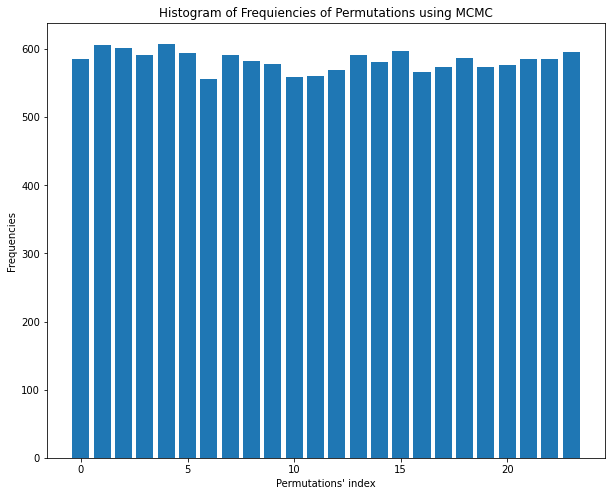

In [33]:
n, a, N = 4, 7, 14000
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

Streaming output truncated to the last 5000 lines.
(5, 4, 7, 2, 3, 1, 8, 6)
(5, 4, 7, 2, 3, 6, 1, 8)
(5, 4, 7, 2, 3, 6, 8, 1)
(5, 4, 7, 2, 3, 8, 1, 6)
(5, 4, 7, 2, 3, 8, 6, 1)
(5, 4, 7, 2, 6, 3, 1, 8)
(5, 4, 7, 2, 8, 3, 6, 1)
(5, 4, 7, 3, 1, 6, 8, 2)
(5, 4, 7, 3, 2, 6, 8, 1)
(5, 4, 7, 3, 8, 1, 2, 6)
(5, 4, 7, 3, 8, 1, 6, 2)
(5, 4, 7, 6, 1, 8, 2, 3)
(5, 4, 7, 6, 3, 2, 1, 8)
(5, 4, 7, 6, 3, 2, 8, 1)
(5, 4, 7, 6, 3, 8, 2, 1)
(5, 4, 7, 6, 8, 2, 3, 1)
(5, 4, 7, 8, 1, 2, 3, 6)
(5, 4, 7, 8, 1, 3, 2, 6)
(5, 4, 7, 8, 2, 3, 6, 1)
(5, 4, 7, 8, 2, 6, 3, 1)
(5, 4, 7, 8, 3, 1, 2, 6)
(5, 4, 7, 8, 3, 2, 1, 6)
(5, 4, 7, 8, 3, 2, 6, 1)
(5, 4, 7, 8, 3, 6, 1, 2)
(5, 4, 7, 8, 3, 6, 2, 1)
(5, 4, 7, 8, 6, 3, 2, 1)
(5, 4, 8, 1, 3, 2, 7, 6)
(5, 4, 8, 1, 3, 6, 7, 2)
(5, 4, 8, 1, 3, 7, 2, 6)
(5, 4, 8, 1, 6, 3, 7, 2)
(5, 4, 8, 1, 6, 7, 3, 2)
(5, 4, 8, 1, 7, 6, 2, 3)
(5, 4, 8, 1, 7, 6, 3, 2)
(5, 4, 8, 2, 1, 3, 6, 7)
(5, 4, 8, 2, 1, 7, 3, 6)
(5, 4, 8, 2, 3, 7, 6, 1)
(5, 4, 8, 2, 6, 3, 7, 1)
(5, 4, 8, 2, 7, 3, 6, 1)

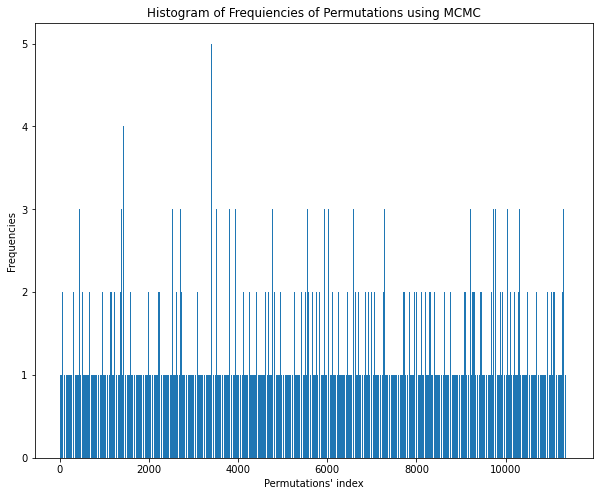

In [34]:
n, a, N = 8, 28, 14000
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

Streaming output truncated to the last 5000 lines.
(8, 11, 7, 2, 5, 4, 10, 3, 6, 1, 12, 9)
(8, 11, 7, 3, 1, 2, 6, 4, 12, 5, 10, 9)
(8, 11, 7, 5, 6, 2, 10, 12, 1, 4, 9, 3)
(8, 11, 7, 5, 6, 2, 10, 12, 9, 4, 1, 3)
(8, 11, 7, 5, 6, 12, 10, 2, 1, 4, 9, 3)
(8, 11, 7, 5, 6, 12, 10, 4, 1, 2, 9, 3)
(8, 11, 7, 6, 4, 9, 12, 2, 10, 3, 1, 5)
(8, 11, 9, 1, 4, 6, 2, 12, 10, 7, 5, 3)
(8, 11, 9, 1, 12, 6, 2, 4, 10, 7, 5, 3)
(8, 11, 9, 2, 4, 7, 12, 6, 10, 3, 1, 5)
(8, 11, 9, 5, 4, 7, 3, 10, 12, 1, 2, 6)
(8, 11, 9, 6, 4, 7, 12, 2, 10, 3, 1, 5)
(8, 11, 9, 7, 4, 2, 12, 6, 10, 3, 1, 5)
(8, 11, 9, 7, 4, 2, 12, 6, 10, 5, 1, 3)
(8, 11, 9, 7, 12, 2, 4, 6, 10, 5, 1, 3)
(8, 11, 10, 1, 2, 6, 4, 5, 3, 9, 12, 7)
(8, 11, 10, 1, 9, 6, 4, 5, 3, 2, 12, 7)
(8, 11, 10, 1, 12, 4, 3, 6, 2, 7, 9, 5)
(8, 11, 10, 1, 12, 4, 3, 6, 9, 7, 2, 5)
(8, 11, 10, 2, 7, 3, 6, 1, 5, 4, 9, 12)
(8, 11, 10, 7, 3, 1, 6, 12, 9, 4, 5, 2)
(8, 11, 10, 7, 3, 12, 6, 1, 9, 4, 5, 2)
(8, 11, 10, 7, 3, 12, 6, 2, 9, 4, 5, 1)
(8, 11, 12, 1, 4, 3, 2, 6, 10

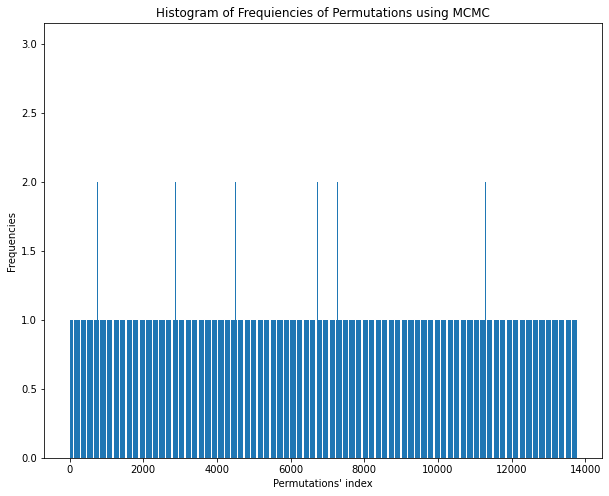

In [35]:
n, a, N = 12, 42, 14000
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

Result by MCMC is same as obtained by other method.